## Análise de $Q(t)$ para $t \rightarrow \infty$ quando $V(t)$ é cossenoidal

Exemplo 1.27 do livro do reginaldo adaptado:

Em um circuito RC uma fonte de corrente alternada gera uma diferença de potencial com amplitude de 10 volts e frequência de 10Hz, enquanto a resistência é de $1000 \Omega$ e a capacitância é de $10^{−4} F$ (farads).

Vamos encontrar a carga Q(t) no capacitor em cada instante t, se Q(0) = 0 e o limite superior de t é infinto

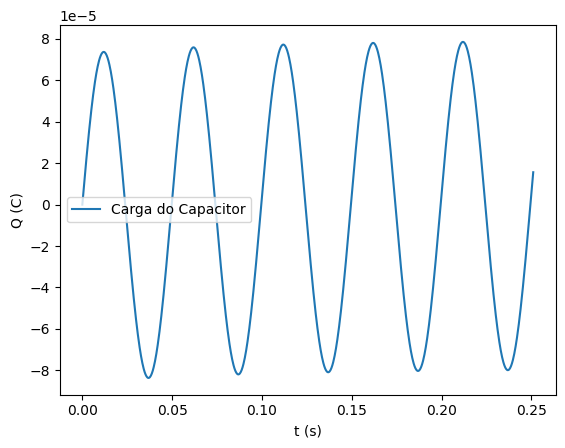

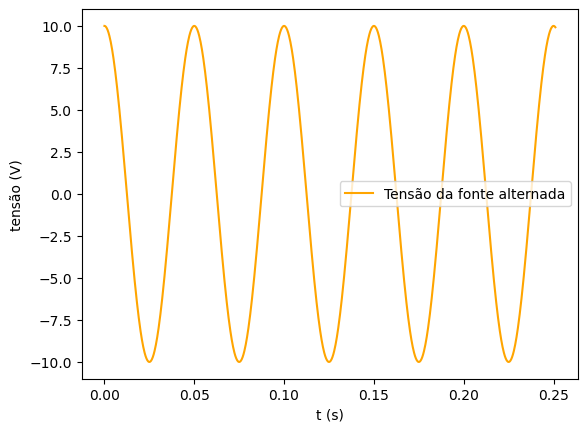

In [30]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import display, Markdown, Latex
from scipy.integrate import quad as integrate

R = 10**3
C = 10**-4
V = lambda t, f = 20, phi = 0: 10 * np.cos(
    2 * np.pi * f * t + phi
)
hard_function = lambda t, V = V, R = R, C = C: np.exp(t/(R*C)) * V(t) / R

def Q(t, Q_0 = 0, R = R, C = C, V = V):
    result  = 1 / np.exp(t/(R*C))
    result *= (
        integrate(
             hard_function, 0, t
        )[0] +
        Q_0
    )
    return result

time_interval = np.linspace(0, 0.251, 1000)
y = np.vectorize(Q)(time_interval)

# mostrar carga (y) por intervalo de tempo (x)
plt.plot(time_interval, y, label = 'Carga do Capacitor')
plt.xlabel('t (s)')
plt.ylabel('Q (C)')
plt.legend()
plt.show()

# mostrar tensão (V) por intervalo de tempo (x)
tensao = np.vectorize(V)(time_interval)
plt.plot(time_interval, tensao, label = 'Tensão da fonte alternada', color = 'orange')
plt.xlabel('t (s)')
plt.ylabel('tensão (V)')
plt.legend()
plt.show()